<center>
    <img src="https://www.ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" width='30%'>
</center>

----------


[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Deep Learning </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Neural Networks - PyTorch Introduction (Iris) </b></font></p>


----------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Data Preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [3]:
type(X_train)

numpy.ndarray

In [4]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Visualization

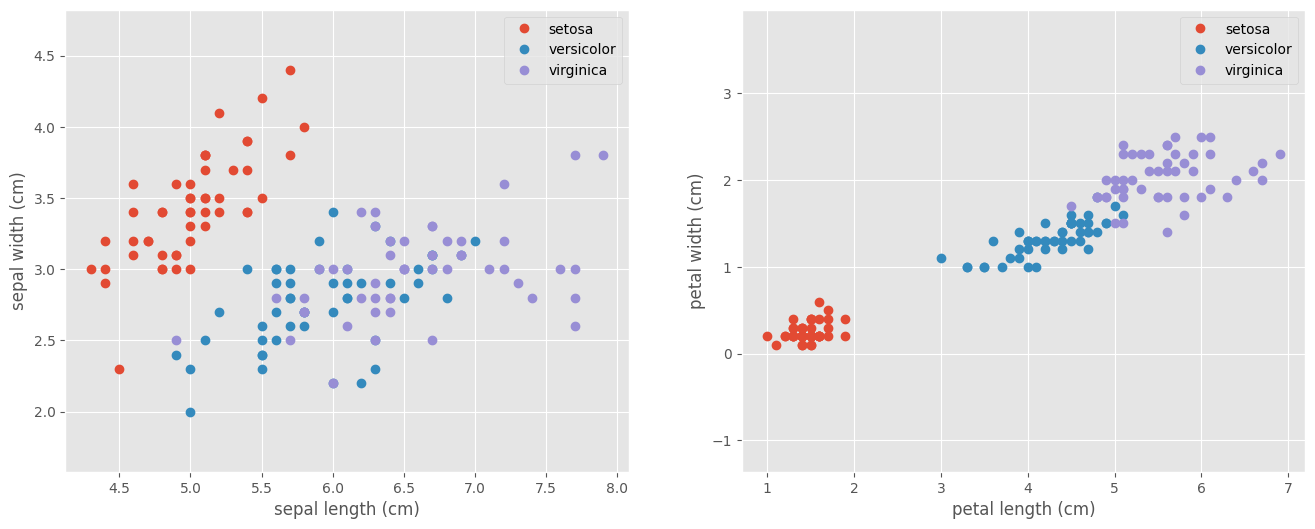

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

# PyTorch Models

In [7]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [8]:
print("torch.cuda.is_available()", torch.cuda.is_available())
print("torch.cuda.device_count()", torch.cuda.device_count())
print("torch.cuda.current_device()", torch.cuda.current_device())
print("torch.cuda.get_device_name(0)", torch.cuda.get_device_name(0))
print("torch.cuda.is_available()", torch.cuda.is_available())

torch.cuda.device(0)
torch.cuda.get_device_name(0)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

torch.cuda.is_available() True
torch.cuda.device_count() 1
torch.cuda.current_device() 0
torch.cuda.get_device_name(0) NVIDIA GeForce GTX 1650 Ti
torch.cuda.is_available() True
NVIDIA GeForce GTX 1650 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


## Construct the NN model class

In [9]:
# # Exercise

# # Build a Module, and train the network
# # We want you to create a 2 layer network
# # First output dimension is 50, second is 50.
# # Use the relu activation inbetween layers from F.relu
# # What is the input dimension?

# class MyModel(nn.Module):

#     def __init__(self, input_size, num_classes):
#       super(MyModel, self).__init__()

#       self.layer1 = nn.Linear(input_size, 50)
#       self.layer2 = nn.Linear(50, 50)
#       self.out_layer = nn.Linear(50, num_classes)

#     def forward(self, x):
#       x1 = self.layer1(x)
#       x1 = F.relu(x1)

#       x2 = self.layer2(x1)
#       x2 = F.relu(x2)

#       x_out = self.out_layer(x2)
#       x_out = F.softmax(x_out, dim = 1)

#       return x_out

In [10]:
class MyModel(nn.Module):
  def __init__(self, **kwargs):
    ...
    # Define Model

  def forward(self, x):
    ...
    # define flow of output

In [11]:
# 50
# 75
# 3

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.hidden_layer1 = nn.Linear(input_dim, 50)
        self.hidden_layer2 = nn.Linear(50, 50)
        # self.layer3 = nn.Linear(50, 75)
        self.out = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        # x = F.relu(self.layer3(x))
        x = F.softmax(self.out(x), dim=1)
        return x

## Set the Optimizer and Loss Function

In [12]:
#dir(torch.optim)

In [13]:
model = Model(X_train.shape[1])
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
CE_loss = nn.CrossEntropyLoss()

Model(
  (hidden_layer1): Linear(in_features=4, out_features=50, bias=True)
  (hidden_layer2): Linear(in_features=50, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=3, bias=True)
)


## Convert Arrays to Tensors

In [14]:
type(X_train)

numpy.ndarray

In [15]:
X_train_T = Variable(torch.from_numpy(X_train)).float()
y_train_T = Variable(torch.from_numpy(y_train)).long()
X_test_T  = Variable(torch.from_numpy(X_test)).float()
y_test_T  = Variable(torch.from_numpy(y_test)).long()

In [16]:
type(X_train_T)

torch.Tensor

## Model Training

> What does the `torch.no_grad` do?
    > It deactivates autograd engine which helps reduce the memory usage and speed up computations during inference stage

Write some training code that:

1. tracks all test loss values
2. tracks the test accuracy
3. trains the network


In [17]:
# epochs = 100

# # Define variables for tracking loss and acc
# test_loss = []
# test_acc = []

# # Do the training loop
# # In the training loop, compute the test loss and accuarcy

# for epoch in range(epochs):
#     y_pred = model(X_train_T)
#     loss = CE_loss(y_pred, y_train_T)
#     test_loss.append(loss.item())

#     loss.backward()
#     # Applies the update step
#     optimizer.step()

#     with torch.no_grad():
#         y_pred = model(X_test_T)
#         # Batch x Class Probs

#         correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
#         test_acc.append(correct.mean())

In [18]:
# Solution

epochs  = 100
loss_hist = np.zeros((epochs,))
accuracy_hist = np.zeros((epochs,))

for epoch in range(epochs):
    y_pred = model(X_train_T)
    loss = CE_loss(y_pred, y_train_T)
    loss_hist[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test_T)
        correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
        accuracy_hist[epoch] = correct.mean()

In [19]:
print(accuracy_hist)

[0.33333334 0.56666666 0.73333335 0.73333335 0.73333335 0.73333335
 0.73333335 0.73333335 0.80000001 0.83333331 0.80000001 0.83333331
 0.83333331 0.83333331 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331
 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331
 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331 0.83333331
 0.83333331 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.89999998
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.89999998 0.89999998 0.89999998 0.89999998 0.8999

In [20]:
print(loss_hist)

[1.10043919 1.09415805 1.08784056 1.08149421 1.07504964 1.06848538
 1.06183124 1.05507362 1.04813886 1.04102015 1.03377807 1.02637732
 1.01880348 1.0110451  1.003052   0.99486828 0.98648465 0.97785634
 0.96906841 0.96016973 0.95114619 0.94207132 0.93298054 0.92396921
 0.91506666 0.90627182 0.89762777 0.88917041 0.8809464  0.87297207
 0.86527729 0.85788888 0.85080636 0.84403378 0.8375811  0.8314513
 0.82564676 0.82015955 0.81497347 0.810076   0.80545157 0.80108654
 0.79694921 0.79301697 0.78927022 0.78569376 0.78226084 0.77895474
 0.77576447 0.77266574 0.76965022 0.76670343 0.76382035 0.76099944
 0.75823599 0.75552207 0.75285727 0.75024331 0.74767059 0.74514538
 0.74266034 0.74021727 0.73780608 0.73543221 0.73308933 0.73076999
 0.72847003 0.72619241 0.72393507 0.72170079 0.7194832  0.71728426
 0.71509778 0.71292675 0.71075785 0.70859468 0.7064364  0.7042855
 0.70214474 0.70000851 0.6978687  0.69573337 0.69360667 0.69148123
 0.68935531 0.68722749 0.68510413 0.68297905 0.68085229 0.678721

## Model Validation

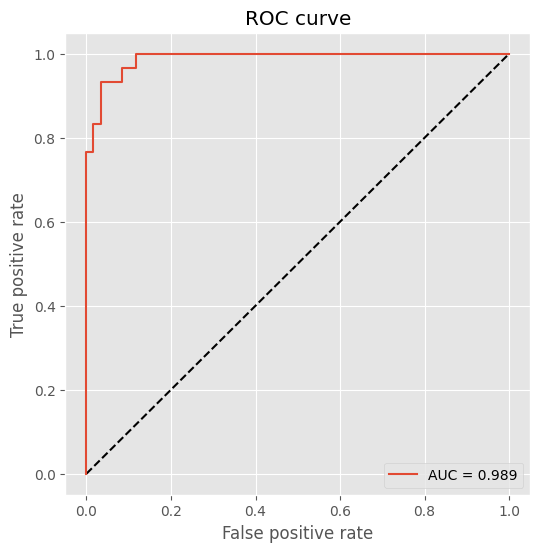

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test_T).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();